### EDA

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from src.database.db_conection import connect_db

In [14]:
engine = connect_db(db_name="candidates")

In [15]:
df = pd.read_sql_query("SELECT * FROM raw_candidates", engine)
print(df.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

In [16]:
df.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


In [17]:
print(df.isnull().sum())

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64


In [18]:
df.count()


First Name                   50000
Last Name                    50000
Email                        50000
Application Date             50000
Country                      50000
YOE                          50000
Seniority                    50000
Technology                   50000
Code Challenge Score         50000
Technical Interview Score    50000
dtype: int64

In [19]:
df.shape

(50000, 10)

In [20]:

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [21]:
print(df.dtypes)

First Name                   object
Last Name                    object
Email                        object
Application Date             object
Country                      object
YOE                           int64
Seniority                    object
Technology                   object
Code Challenge Score          int64
Technical Interview Score     int64
dtype: object


In [22]:
print(df.describe(include="object"))

       First Name Last Name                 Email Application Date Country  \
count       50000     50000                 50000            50000   50000   
unique       3007       474                 49833             1646     244   
top         Sarai   Murazik  marianne31@yahoo.com       2020-07-07  Malawi   
freq           33       138                     3               50     242   

       Seniority        Technology  
count      50000             50000  
unique         7                24  
top       Intern  Game Development  
freq        7255              3818  


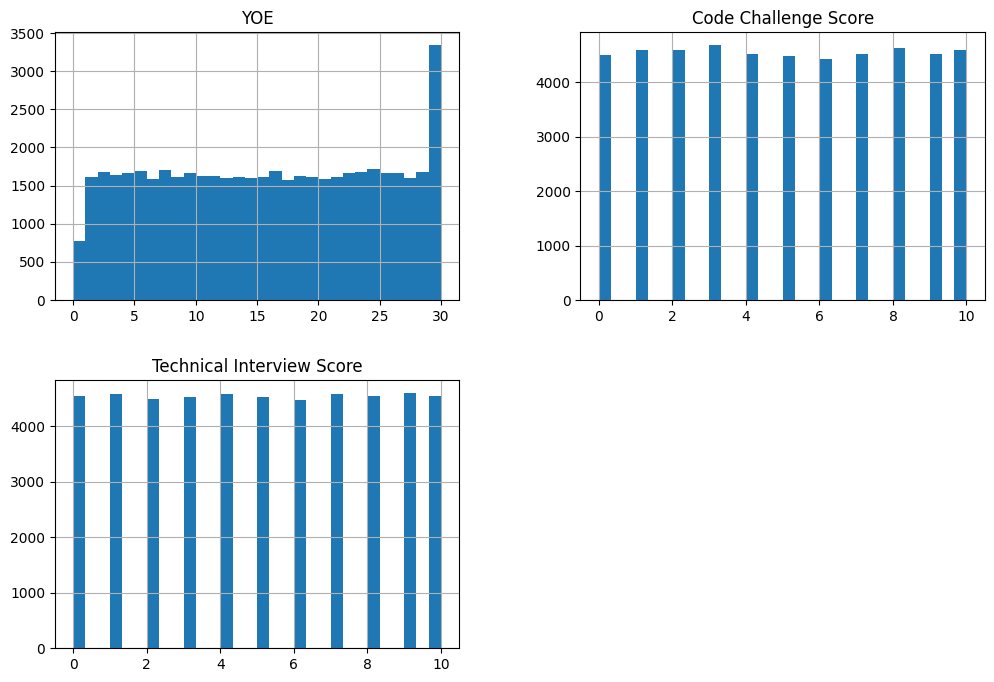

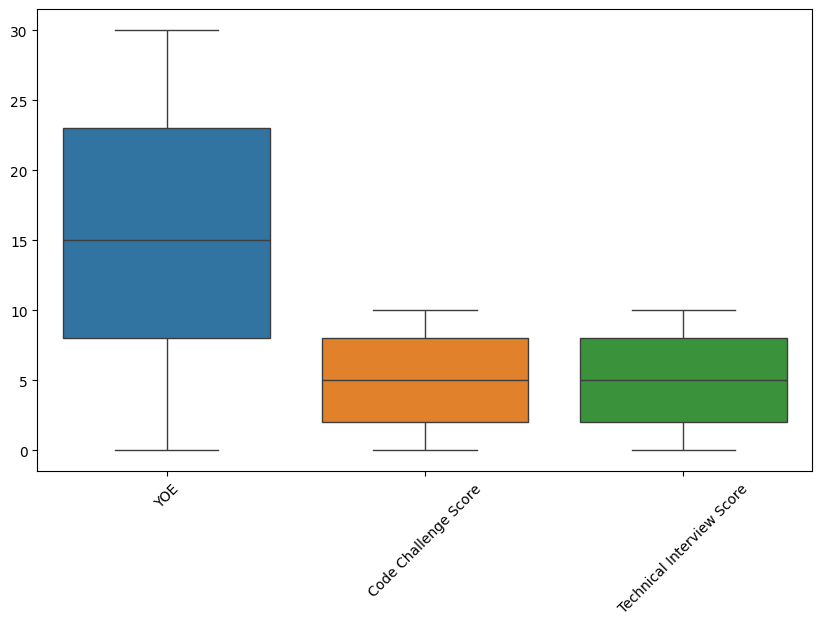

In [23]:
# Histogramas
df.hist(figsize=(12,8), bins=30)
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=["number"]))
plt.xticks(rotation=45)
plt.show()

First Name
Sarai        33
Elyse        32
Eva          31
Anabel       31
Nayeli       30
             ..
Jaydon        6
Janis         6
Paul          5
Antonetta     5
Gudrun        5
Name: count, Length: 3007, dtype: int64
Last Name
Murazik      138
Nitzsche     134
Metz         133
Lang         133
Harvey       133
            ... 
Kutch         83
Howe          82
White         79
McClure       78
Bechtelar     76
Name: count, Length: 474, dtype: int64
Email
marianne31@yahoo.com          3
fern70@gmail.com              3
isaiah24@yahoo.com            2
missouri65@yahoo.com          2
kelton91@hotmail.com          2
                             ..
rocky_mitchell@hotmail.com    1
dolores.roob@hotmail.com      1
savanah.stracke@gmail.com     1
vivienne.fritsch@yahoo.com    1
abigayle.crooks@yahoo.com     1
Name: count, Length: 49833, dtype: int64
Application Date
2020-07-07    50
2018-12-06    48
2018-09-23    47
2020-07-18    47
2019-09-01    47
              ..
2022-01-05    17
20

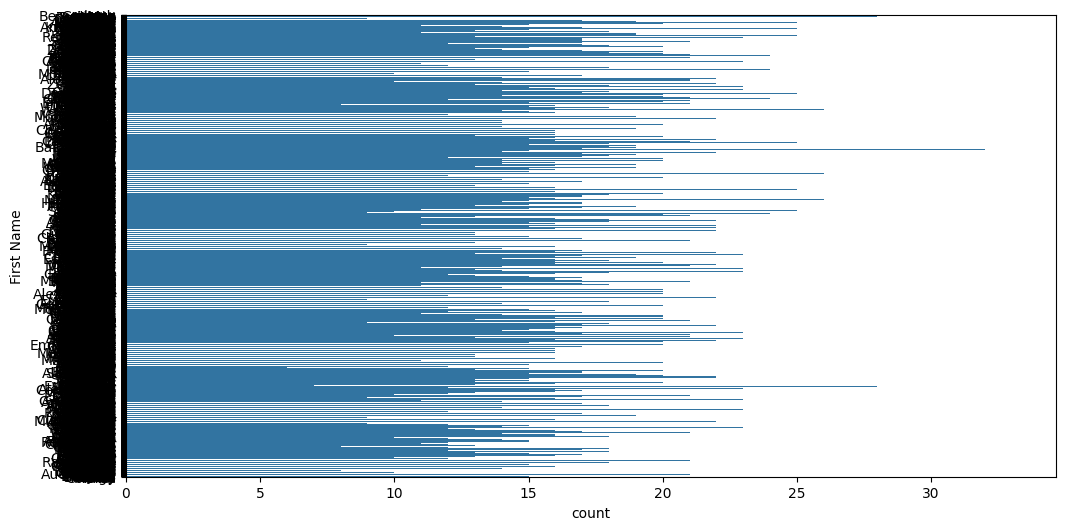

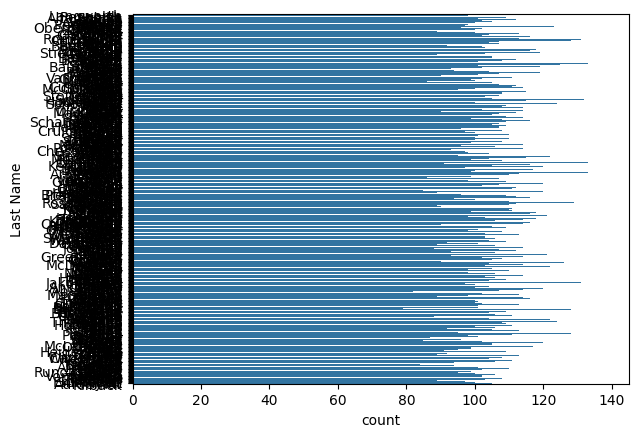

In [ ]:
# Contar valores únicos en cada columna categórica
for col in df.select_dtypes(include="object"):
    print(df[col].value_counts())

# Gráficos de barras para variables categóricas
plt.figure(figsize=(12,6))
for col in df.select_dtypes(include="object"):
    sns.countplot(y=df[col])
    plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()